### Ejercicio 2.1
Implementar un aplicativo o notebook que levante una imagen en nivel de gris (o que la convierta a YIQ y retenga solo el Y) y aplique el filtrado por convolución aquí visto: 

    -1 Pasabajos: Plano, Bartlett 3x3, Gaussiano 5x5.
    -2 Detectores de bordes: Laplacianov4, Sobel4 orientaciones.
    -3 Pasabanda.
Respecto del “cierre” de la imagen cerca de los bordes, implementar la técnica no ma-temáticamente perfecta de “repetir” artificialmente filas o columnas cuando estas hagan falta. Por ejemplo, si el kerneles 3x3y estoy en la primera columna, y no hay ninguna columna a la izquierda, entonces repito la primera columna como si estuviese en la imagen original.

### Ejercicio 2.2
Desarrollar un aplicativo o notebook que implemente los conceptos de morfología en niveles de gris aquí descriptos, con un elemento estructurante3x3. El mismo incluirá las siguientes funciones:
   
    -Erosión (tomar el mínimo valor de luminancia de la vecindad).
    -Dilatación (máximo)
    -Apertura, cierre, borde morfológico
    -Mediana
    -Top hat

Incluir la capacidad de copiar la componente de la imagen procesada en la componente original, para poder aplicar dos o más filtrados en secuencia.

In [1]:
import cv2 # opencv
from matplotlib import pyplot as plt # matplotlib
import numpy as np # numpy
%matplotlib inline 

In [2]:
def open_image(path):
    imageToConvert = cv2.imread(path)
    return cv2.cvtColor(imageToConvert, cv2.COLOR_BGR2RGB)

def normalize_image(img):
    normalized_image =  np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            for k in range(len(img[i][j])):
                normalized_image[i][j][k] = img[i][j][k] / 255  
    return normalized_image

RGB_2_YIQ_MATRIX = np.array([[ 0.299, 0.587, 0.114], 
                          [ 0.595716, -0.274453, -0.321263], 
                          [ 0.211456, -0.522591, 0.311135]])

YIQ_2_RGB_MATRIX = np.array([[1, 0.9663, 0.6210], 
                          [1, -0.2721, -0.6474], 
                          [1, -1.1070, 1.7046]])

def rgb_2_yiq(img):
    yiq_image =  np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            yiq_image[i][j] = RGB_2_YIQ_MATRIX.dot(img[i][j])
    return yiq_image

def yiq_2_rgb(img):
    rgb_image =  np.zeros((len(img),len(img[0]),len(img[0][0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            rgb_image[i][j] = YIQ_2_RGB_MATRIX.dot(img[i][j])
    return rgb_image

def get_y_values_of_an_image(img):
    y_img = np.zeros((len(img),len(img[0])))
    for i in range(len(img)):
        for j in range(len(img[i])):
            y_img[i][j] = img[i][j][0]
    return y_img

def fill_i_and_q_values_of_an_y_image(y_img):
    yiq_image =  np.zeros((len(y_img),len(y_img[0]), 3))
    for i in range(len(y_img)):
        for j in range(len(y_img[i])):
            yiq_image[i][j][0] = y_img[i][j]
            yiq_image[i][j][1] = 0
            yiq_image[i][j][2] = 0
    return yiq_image


### Ejercicio 2.1

In [3]:
img = open_image('umm_000048.png')
normalized_img = normalize_image(img)
yiq_image = rgb_2_yiq(normalized_img)
y_image = get_y_values_of_an_image(yiq_image)

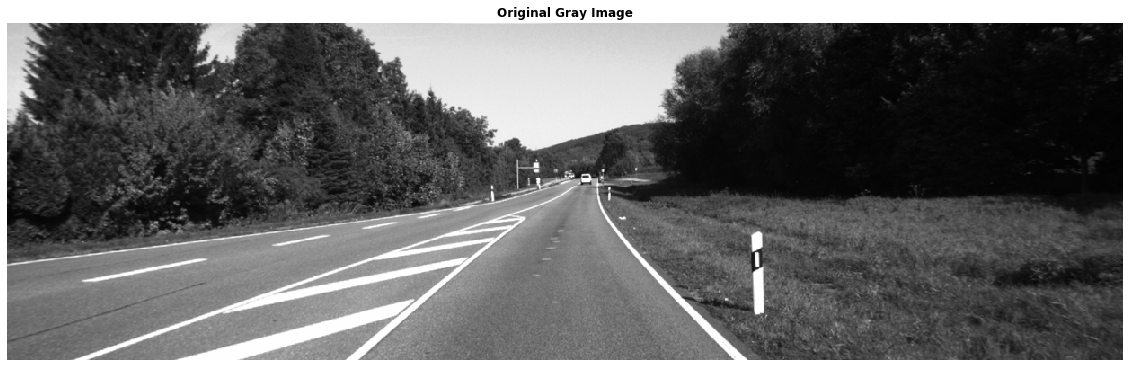

In [4]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(y_image)))
plt.axis('off')
plt.title('Original Gray Image', fontweight='bold')
plt.show()

In [5]:
BARTLETT_FILTER = np.array([[ 1, 2, 1], 
                    [ 2, 4, 2], 
                    [ 1, 2, 1]])

In [6]:
def apply_kernel_to_image(gray_img, kernel):
    img_filtered =  np.zeros((len(gray_img),len(gray_img[0])))
    extra_border = 0
    if len(kernel) == 3:
        extra_border = 1 
    elif len(kernel) == 5:
        extra_border = 2
    gray_img = cv2.copyMakeBorder(gray_img, extra_border, extra_border, extra_border, extra_border, cv2.BORDER_REFLECT);
    for i in range(extra_border, len(gray_img) - extra_border):
        for j in range(extra_border, len(gray_img[i]) - extra_border):
            aux_img = gray_img[i - extra_border:i + extra_border + 1, j - extra_border:j + extra_border + 1]
            k = (aux_img * kernel).sum() / kernel.sum()
            img_filtered[i-extra_border][j-extra_border] = k
    return img_filtered
    
def apply_zero_gain_kernel_to_image(gray_img, kernel):
    img_filtered =  np.zeros((len(gray_img),len(gray_img[0])))
    extra_border = 0
    if len(kernel) == 3:
        extra_border = 1 
    elif len(kernel) == 5:
        extra_border = 2
    gray_img = cv2.copyMakeBorder(gray_img, extra_border, extra_border, extra_border, extra_border, cv2.BORDER_REFLECT);
    for i in range(extra_border, len(gray_img) - extra_border):
        for j in range(extra_border, len(gray_img[i]) - extra_border):
            aux_img = gray_img[i - extra_border:i + extra_border + 1, j - extra_border:j + extra_border + 1]
            k = (aux_img * kernel).sum()
            img_filtered[i-extra_border][j-extra_border] = k
    return img_filtered

In [7]:
bartlett_image_filtered = apply_kernel_to_image(y_image, BARTLETT_FILTER)

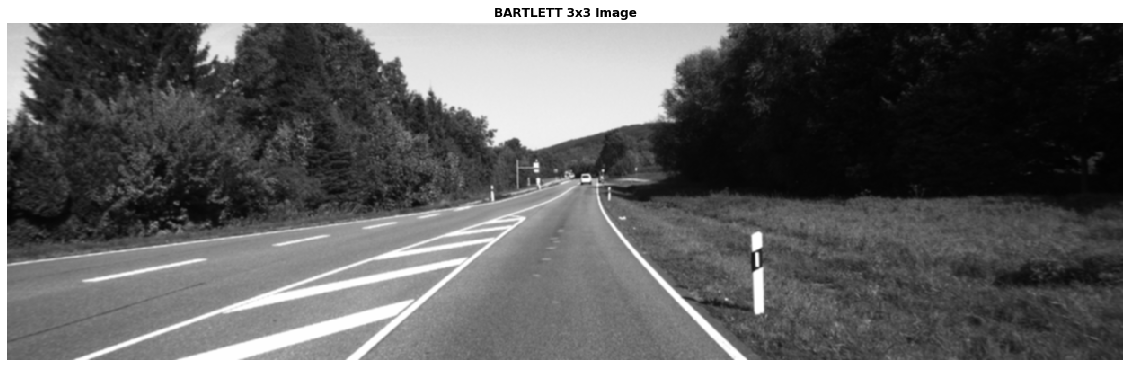

In [8]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(bartlett_image_filtered)))
plt.axis('off')
plt.title('BARTLETT 3x3 Image', fontweight='bold')
plt.show()

In [9]:
GAUSSIAN_FILTER = np.array([[ 1, 4, 6, 4, 1], 
                            [ 4, 16, 24, 16, 4],
                            [ 6, 24, 36, 24, 6],
                            [ 4, 16, 24, 16, 4],
                            [ 1, 4, 6, 4, 1]])

In [10]:
gaussian_image_filtered = apply_kernel_to_image(y_image, GAUSSIAN_FILTER)

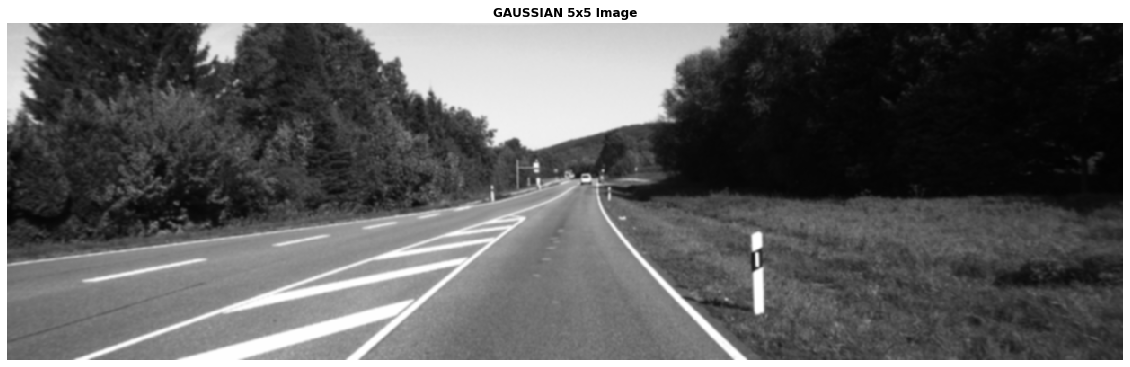

In [11]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(gaussian_image_filtered)))
plt.axis('off')
plt.title('GAUSSIAN 5x5 Image', fontweight='bold')
plt.show()

In [12]:
FLAT_FILTER = np.array([[ 1, 1, 1], 
                    [ 1, 1, 1], 
                    [ 1, 1, 1]])

In [13]:
flat_image_filtered = apply_kernel_to_image(y_image, FLAT_FILTER)

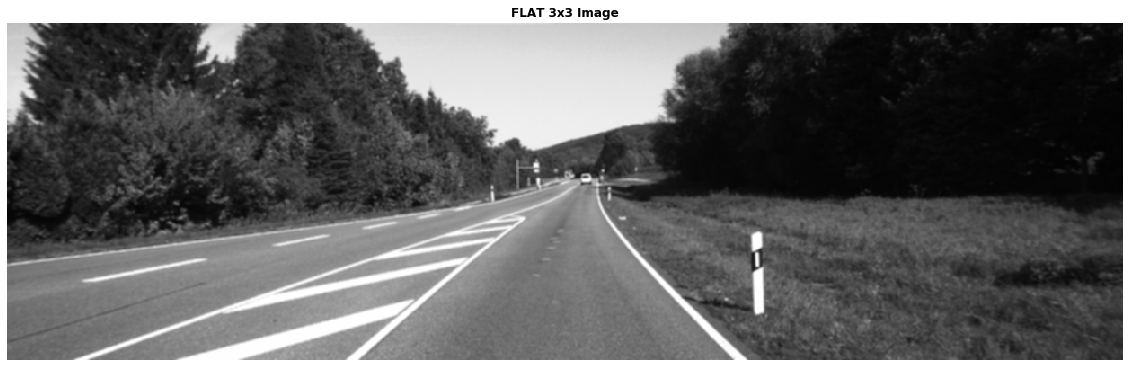

In [14]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(flat_image_filtered)))
plt.axis('off')
plt.title('FLAT 3x3 Image', fontweight='bold')
plt.show()

In [15]:
LAPLACIAN_FILTER = np.array([[ 0, -1, 0], 
                            [ -1, 4, -1], 
                            [ 0, -1, 0]])

In [16]:
laplacian_image_filtered = apply_zero_gain_kernel_to_image(y_image, LAPLACIAN_FILTER)
for i in range(len(laplacian_image_filtered)):
        for j in range(len(laplacian_image_filtered[i])):
            if laplacian_image_filtered[i][j] > 1:
                laplacian_image_filtered[i][j] = 1
            elif laplacian_image_filtered[i][j] < 0:
                laplacian_image_filtered[i][j] = 0

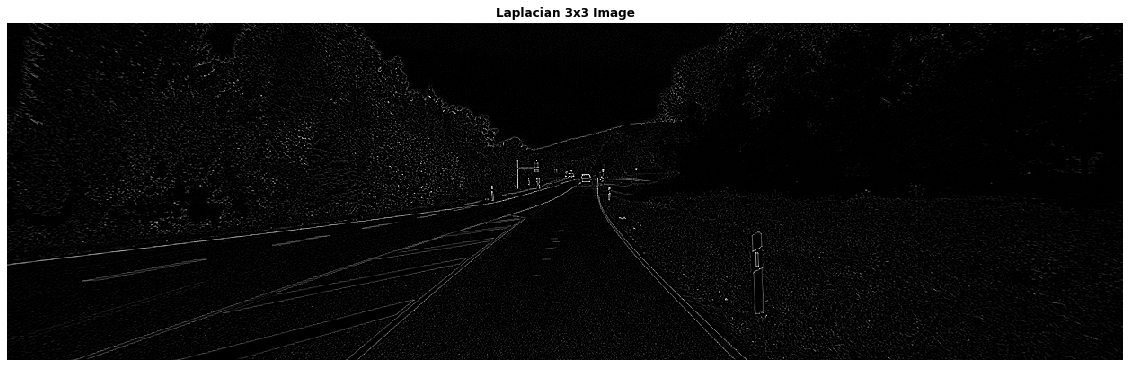

In [17]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(laplacian_image_filtered)))
plt.axis('off')
plt.title('Laplacian 3x3 Image', fontweight='bold')
plt.show()

In [18]:
SOBEL_FILTER = np.array([[ -1, 0, 1], 
                        [ -2, 0, 2], 
                        [ -1, 0, 1]])

In [19]:
sobel_west_image_filtered = apply_zero_gain_kernel_to_image(y_image, SOBEL_FILTER)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


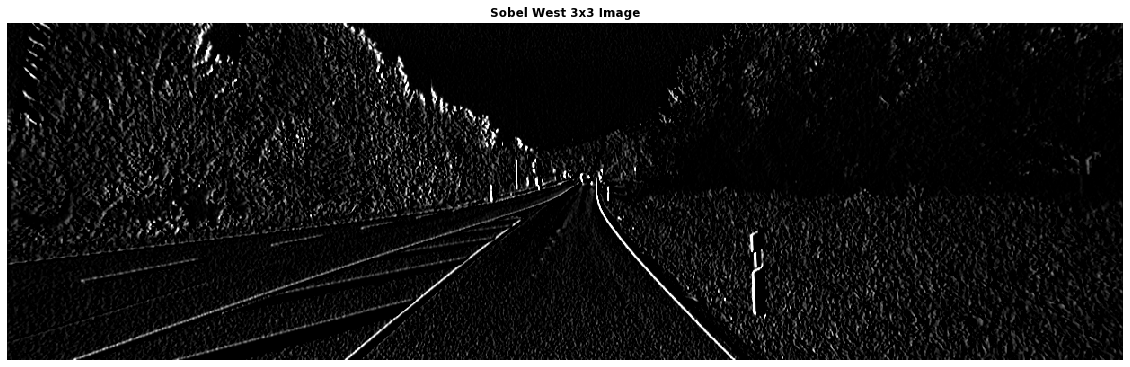

In [20]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(sobel_west_image_filtered)))
plt.axis('off')
plt.title('Sobel West 3x3 Image', fontweight='bold')
plt.show()

In [21]:
sobel_east_image_filtered = apply_zero_gain_kernel_to_image(y_image, np.rot90(SOBEL_FILTER))

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


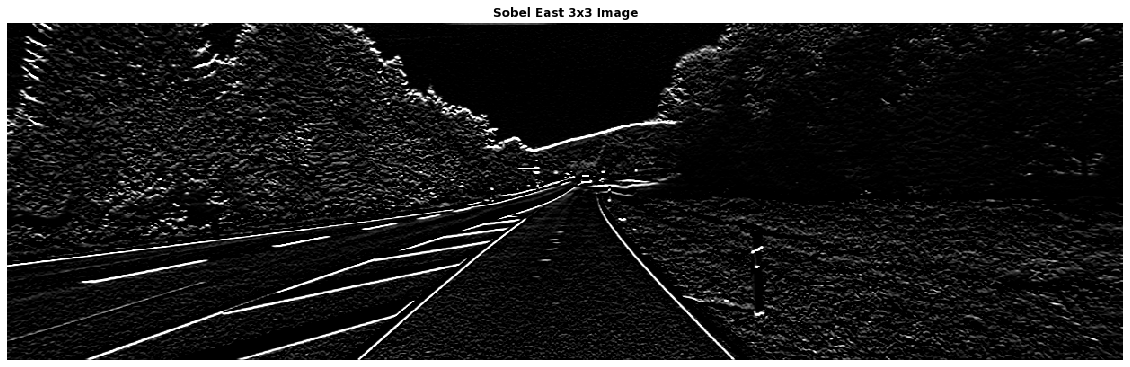

In [22]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(sobel_east_image_filtered)))
plt.axis('off')
plt.title('Sobel East 3x3 Image', fontweight='bold')
plt.show()

Para combinar ambos bordes (verticales y horizontales) utilizamos la ecuación del gradiente:

In [23]:
gradient_magnitude = np.sqrt(np.square(sobel_west_image_filtered) + np.square(sobel_east_image_filtered))
gradient_magnitude = gradient_magnitude/ gradient_magnitude.max()

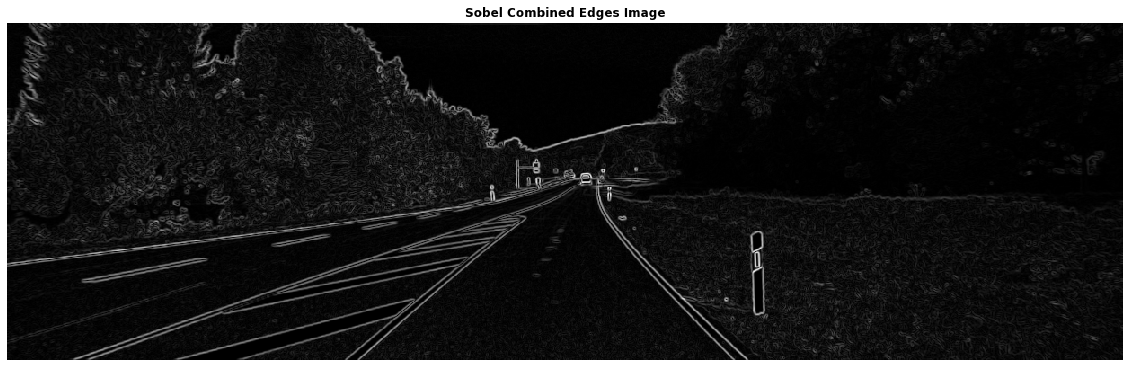

In [24]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(gradient_magnitude)))
plt.axis('off')
plt.title('Sobel Combined Edges Image', fontweight='bold')
plt.show()

In [100]:
dog_image = gaussian_image_filtered - bartlett_image_filtered
for i in range(len(dog_image)): #If there are values less than zero, convert them to zero.
    for j in range(len(dog_image[i])):
        if dog_image[i][j] < 0:
            dog_image[i][j] = 0

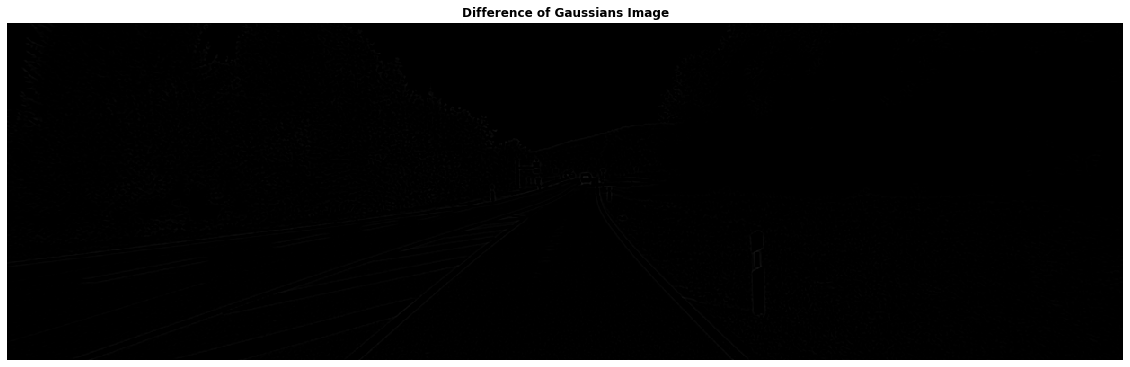

In [102]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(dog_image)))
plt.axis('off')
plt.title('Difference of Gaussians Image', fontweight='bold')
plt.show()

### Ejercicio 2.2


In [48]:
def erode_image(gray_img, kernel_size):
    img_filtered =  np.zeros((len(gray_img),len(gray_img[0])))
    extra_border = 0
    if kernel_size == 3:
        extra_border = 1 
    elif kernel_size == 5:
        extra_border = 2
    gray_img = cv2.copyMakeBorder(gray_img, extra_border, extra_border, extra_border, extra_border, cv2.BORDER_REFLECT);
    for i in range(extra_border, len(gray_img) - extra_border):
        for j in range(extra_border, len(gray_img[i]) - extra_border):
            aux_img = gray_img[i - extra_border:i + extra_border + 1, j - extra_border:j + extra_border + 1]
            img_filtered[i-extra_border][j-extra_border] = aux_img.min()
    return img_filtered

In [49]:
img_to_erode = open_image('f05bin.bmp')
normalized_img_to_erode = normalize_image(img_to_erode)
yiq_image_to_erode = rgb_2_yiq(normalized_img_to_erode)
y_image_to_erode = get_y_values_of_an_image(yiq_image_to_erode)

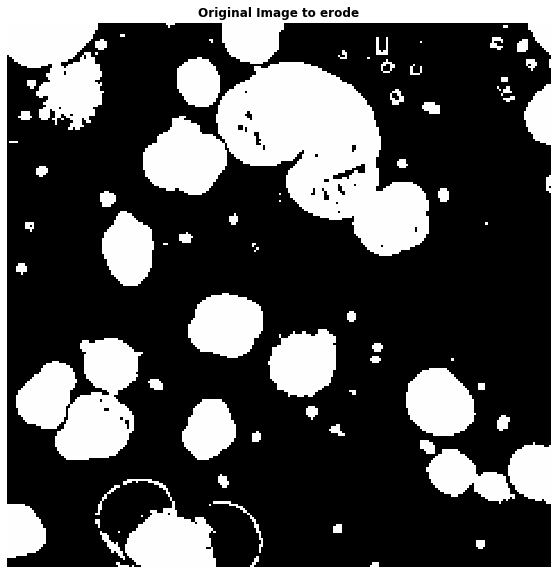

In [50]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(y_image_to_erode)))
plt.axis('off')
plt.title('Original Image to erode', fontweight='bold')
plt.show()

In [69]:
eroded_image = erode_image(y_image_to_erode, 3)

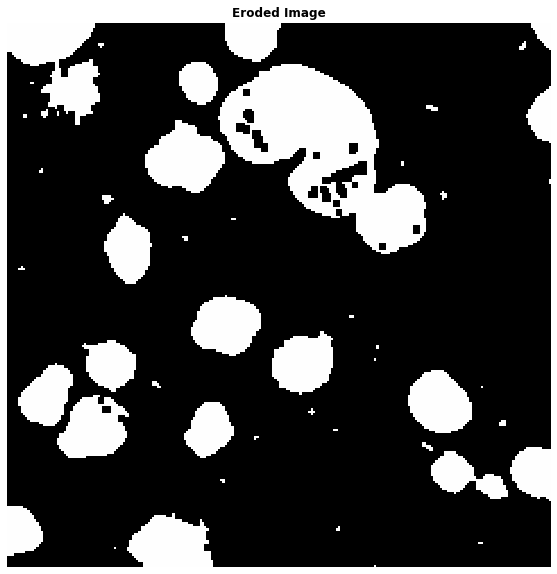

In [70]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(eroded_image)))
plt.axis('off')
plt.title('Eroded Image', fontweight='bold')
plt.show()

In [55]:
def dilate_image(gray_img, kernel_size):
    img_filtered =  np.zeros((len(gray_img),len(gray_img[0])))
    extra_border = 0
    if kernel_size == 3:
        extra_border = 1 
    elif kernel_size == 5:
        extra_border = 2
    gray_img = cv2.copyMakeBorder(gray_img, extra_border, extra_border, extra_border, extra_border, cv2.BORDER_REFLECT);
    for i in range(extra_border, len(gray_img) - extra_border):
        for j in range(extra_border, len(gray_img[i]) - extra_border):
            aux_img = gray_img[i - extra_border:i + extra_border + 1, j - extra_border:j + extra_border + 1]
            img_filtered[i-extra_border][j-extra_border] = aux_img.min()
    return img_filtered

In [58]:
dilated_image = dilate_image(y_image_to_erode, 3)

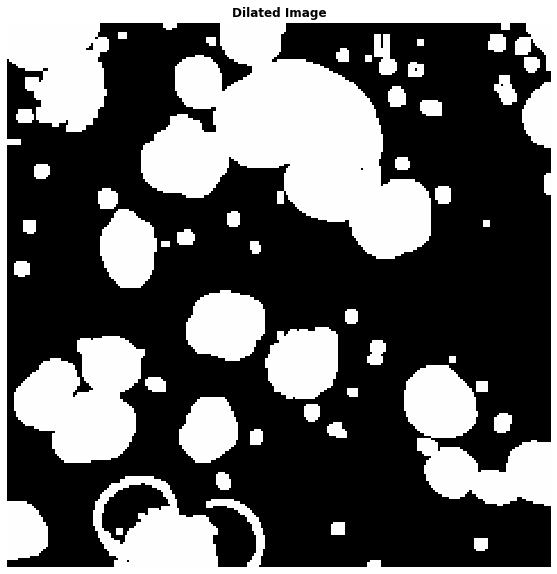

In [59]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(dilated_image)))
plt.axis('off')
plt.title('Dilated Image', fontweight='bold')
plt.show()

In [71]:
imopened_image = dilate_image(eroded_image, 3)

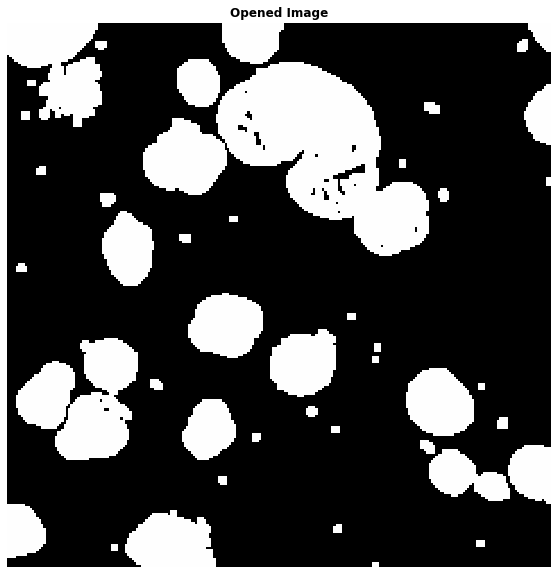

In [73]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(imopened_image)))
plt.axis('off')
plt.title('Opened Image', fontweight='bold')
plt.show()

In [74]:
imclosed_image = erode_image(dilated_image, 3)

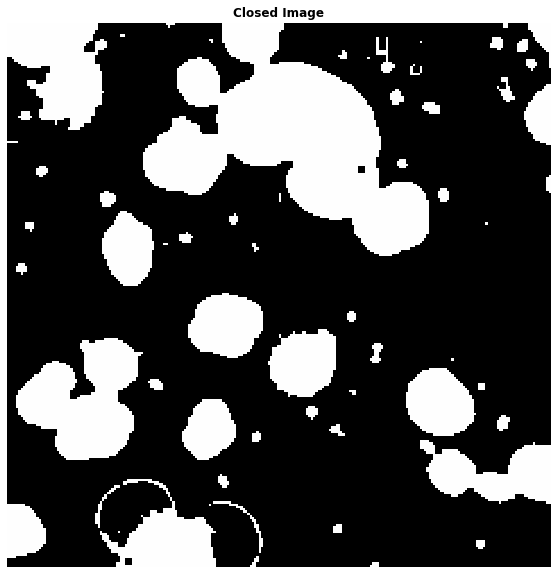

In [75]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(imclosed_image)))
plt.axis('off')
plt.title('Closed Image', fontweight='bold')
plt.show()

In [76]:
edge_image = dilated_image - y_image_to_erode # y_image_to_erode is the original image.

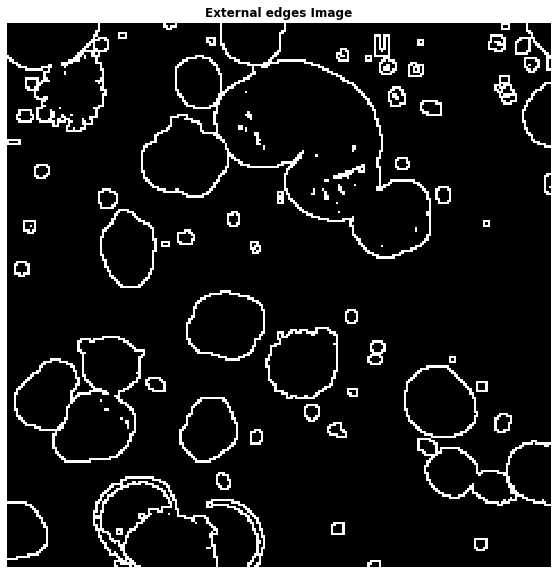

In [77]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(edge_image)))
plt.axis('off')
plt.title('External edges Image', fontweight='bold')
plt.show()

In [79]:
def mean_image(gray_img, kernel_size):
    img_filtered =  np.zeros((len(gray_img),len(gray_img[0])))
    extra_border = 0
    if kernel_size == 3:
        extra_border = 1 
    elif kernel_size == 5:
        extra_border = 2
    gray_img = cv2.copyMakeBorder(gray_img, extra_border, extra_border, extra_border, extra_border, cv2.BORDER_REFLECT);
    for i in range(extra_border, len(gray_img) - extra_border):
        for j in range(extra_border, len(gray_img[i]) - extra_border):
            aux_img = gray_img[i - extra_border:i + extra_border + 1, j - extra_border:j + extra_border + 1]
            img_filtered[i-extra_border][j-extra_border] = aux_img.mean()
    return img_filtered

In [80]:
mean_image = mean_image(y_image_to_erode, 3)

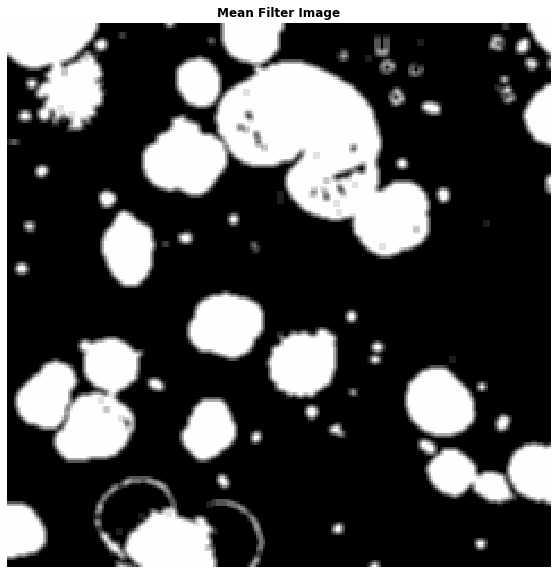

In [81]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(mean_image)))
plt.axis('off')
plt.title('Mean Filter Image', fontweight='bold')
plt.show()

In [83]:
top_hat_image = y_image_to_erode - imopened_image # y_image_to_erode is the original image.

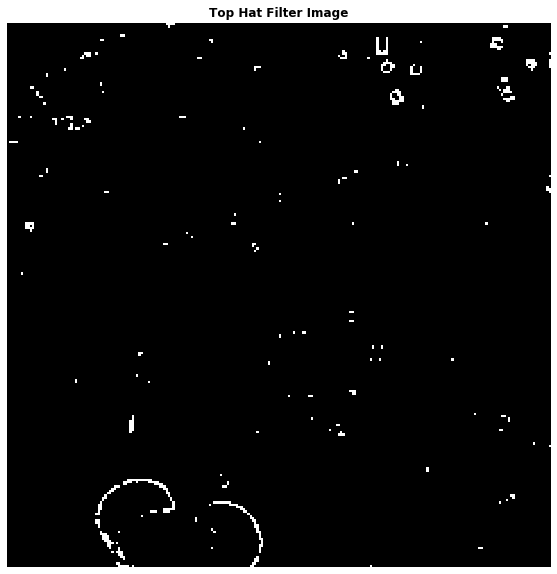

In [84]:
plt.figure(figsize = (20,10))
plt.imshow(yiq_2_rgb(fill_i_and_q_values_of_an_y_image(top_hat_image)))
plt.axis('off')
plt.title('Top Hat Filter Image', fontweight='bold')
plt.show()